In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [12]:
df = pd.DataFrame({'x1': [1.2, 3.4, 5.6, 0.89, 0.65, 7.5, 1.25, 1.54, 2.73, 3.3],
                   'x2': [10.2, 20.3, 15.6, 5.6, 7.4, 8.12, 3.0, 4.3, 22.5, 26.9],
                   'class':[1,1,0,0,1,0,1,0,0,0]
                  })
df

,x1,x2,class
0,1.20,10.20,1
1,3.40,20.30,1
2,5.60,15.60,0
3,0.89,5.60,0
4,0.65,7.40,1
5,7.50,8.12,0
6,1.25,3.00,1
7,1.54,4.30,0
8,2.73,22.50,0
9,3.30,26.90,0


In [3]:
df.dtypes

x1       float64
x2       float64
class      int64
dtype: object

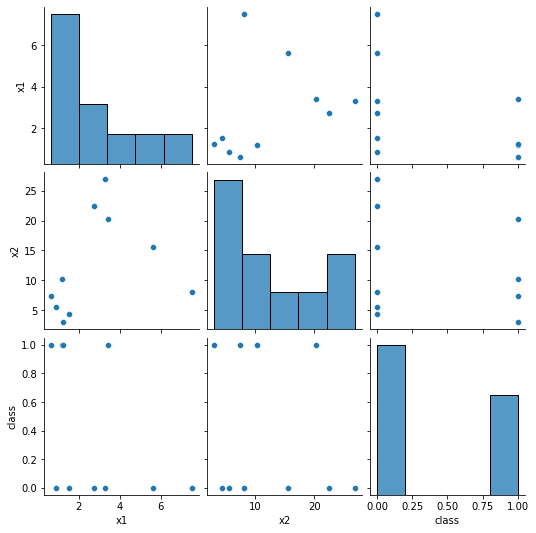

In [5]:
sns.pairplot(df)

In [28]:
def find_gini_impurity(root, left, right):
    class_1 = len(root[root['class']==1])
    class_0 = len(root[root['class']==0])
    root_p1 = class_1/len(df)
    root_p2 = class_0/len(df)
    left_p1 = len(left[left['class']==1])/len(left)
    right_p1 = len(right[right['class']==1])/len(right)
    left_p2 = len(left[left['class']==0])/len(left)
    right_p2 = len(right[right['class']==0])/len(right)
    gi_left = 1- math.pow(left_p1, 2) - math.pow(left_p2,2)
    gi_right = 1-math.pow(right_p1, 2) - math.pow(right_p2, 2)
    total_gi = root_p2 * gi_left + root_p1 * gi_right
    return total_gi
def calculate_the_average_classification (df, feature):
    f = df[feature]
    gi_average = []
    for i,val in enumerate(f):
        if i!= len(f)-1:
            average = (val+f[i+1])/2
            print(average)
            class_less_than_average = df[df[feature]<=average]
            class_greater_than_average = df[df[feature]>average]
            gi = find_gini_impurity(df,class_less_than_average, class_greater_than_average)
            gi_average.append({'average': average, 'gi':gi})
    return gi_average
            
        
gi_average_x1 = pd.DataFrame(calculate_the_average_classification(df, feature='x1'))

x1_best_split = gi_average[gi_average['gi'] == gi_average['gi'].min()]['average']
print(x1_best_split)

    
gi_average_x2 = pd.DataFrame(calculate_the_average_classification(df, feature='x2'))

x2_best_split = gi_average[gi_average['gi'] == gi_average['gi'].min()]['average']
print(x2_best_split)

2.3
4.5
3.2449999999999997
0.77
4.075
4.375
1.395
2.135
3.0149999999999997
3    0.77
Name: average, dtype: float64
15.25
17.95
10.6
6.5
7.76
5.56
3.65
13.4
24.7
3    0.77
Name: average, dtype: float64
